In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  
data = pd.read_csv('/Users/popo./Downloads/randFiles/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns

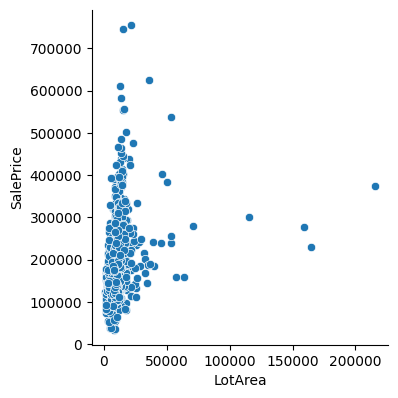

In [4]:
sns.pairplot(data, x_vars=['LotArea'], 
             y_vars='SalePrice', size=4, aspect=1, kind='scatter')
plt.show()

In [5]:
X = data['LotArea']
y = data['SalePrice']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [7]:
X_train
y_train

210      98000
318     260000
239     113000
986     117000
1416    122500
         ...  
1009    102000
802     189000
53      385000
350     318061
79      110000
Name: SalePrice, Length: 1021, dtype: int64

In [8]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [9]:
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const      160028.986729
LotArea         1.946678
dtype: float64

In [10]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     70.12
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.83e-16
Time:                        10:20:36   Log-Likelihood:                -12929.
No. Observations:                1021   AIC:                         2.586e+04
Df Residuals:                    1019   BIC:                         2.587e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.6e+05   3417.631     46.825      0.000    1.53e+05    1.67e+05
LotArea        1.9467      0.232      8.374      0.000       1.490       2.403
==============================================================================
Omnibus:                      445.018   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2920.168
Skew:                           1.882   Prob(JB):                         0.00
Kurtosis:                      10.381   Cond. No.                     2.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

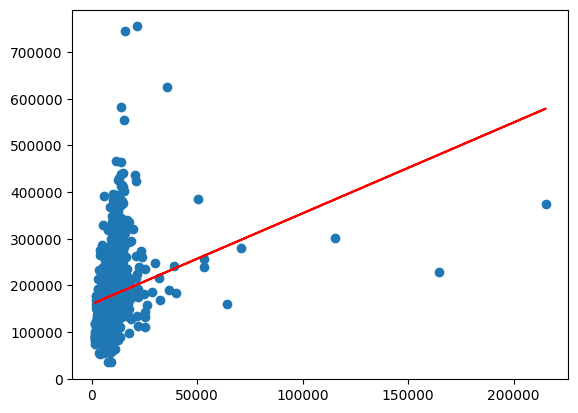

In [11]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.6e+05 + 1.9467*X_train, 'r')
plt.show()

In [12]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

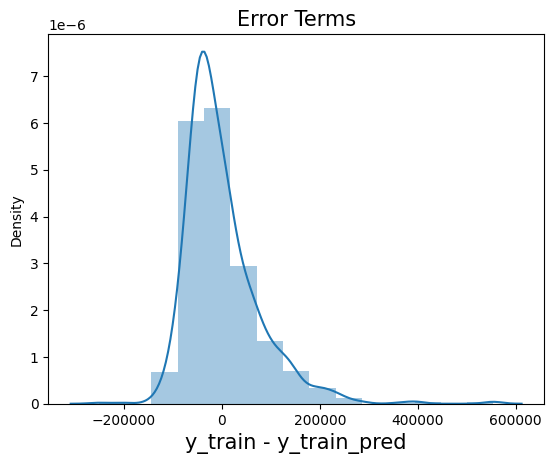

In [13]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

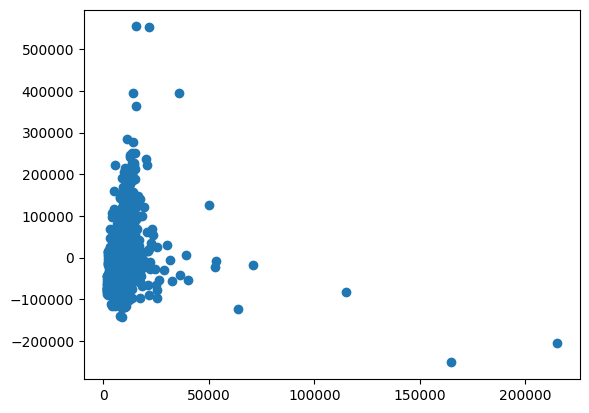

In [14]:
plt.scatter(X_train,res)
plt.show()

In [15]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)
y_test_pred.head()

1436    177549.087532
57      182698.050490
780     175359.074931
382     178026.023609
1170    179262.164055
dtype: float64

In [16]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.08024800685121425

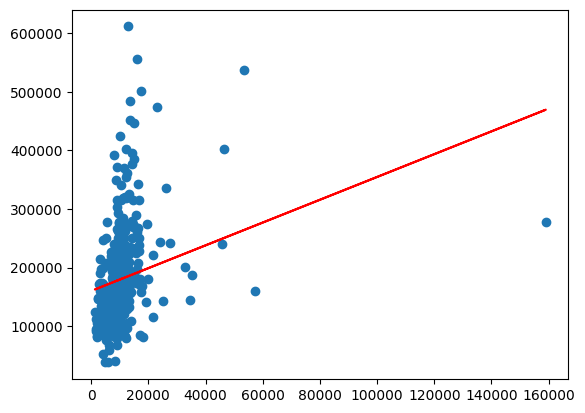

In [17]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

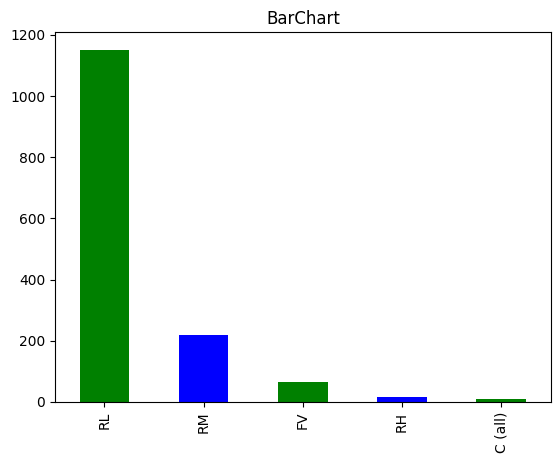

In [18]:
count_Class=pd.value_counts(data["MSZoning"], sort= True)
count_Class.plot(kind= 'bar', color= ["green", "blue"])
plt.title('BarChart')
plt.show()

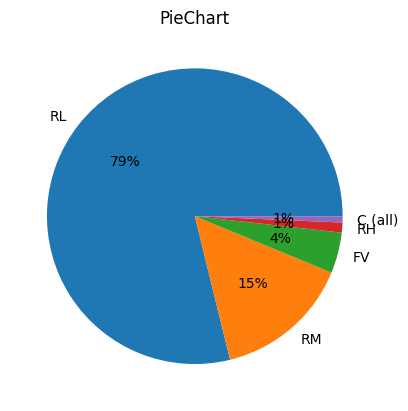

In [19]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('PieChart')
plt.ylabel('')
plt.show()

In [20]:
np.shape(X)

(1460,)

In [21]:
data["MSZoning"]=data["MSZoning"].map({'RL':1,'RM':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['MSZoning'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(978,), (482,)]


In [22]:
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1

ValueError: Expected 2D array, got 1D array instead:
array=[  8800   8402   8688  10289  10010  12342   7200   9965   5389  10768
   9750  14331   9600  24682  10142   9084   4130  17043  17423   8125
   8780   7763   9600  11600  13175  10440  10084   9100   8773   8470
   8393  11146   9000   6000  11194   7340  15611   7200  13101   2448
  17104   6292  12384  10480   5100   8385   8198   4426  11065  11844
  10316  11888   9900   7407   8885  12968  31770  19296   8400   8816
  12257   9066  10182   5119   6768  15426  12936   7500  13472   6000
  10800   5000  14000  10625   5600  13132  10192  14859   2544  15602
   9246   9550  14774   9480  12099  14115   9037   9230  10140   6040
  10140   5000  10355  13517  10463   7500  11839  10000   8910   9236
  14720   8846   9600   6240  14115  12508  10769   9000   8777  11500
  11075   9738   3600   1869  10357   8877   8487  16545  19900   6762
  12150   7711  10420   5700   8963   8924   9790   8400  16059   8190
  11414   5900   4590  11075  25339   7415   9360   9600   6305   7301
   7064  11250  10084   8000  14175   9240  11584  10011   7560  11478
  11361  11216   3635   9100   9808  10400  21384   8791  14230  14157
  13159  11096  10800  20431  10175   8854  13568  21453   8900  14892
  10141  12886   8935   7658  18890  40094   6130   6970  11235  11616
   5000   3182   3072   8944  11435  11040   6173  13072  13360  18450
   7314   7180  11287  12011  10918   7917   8012   9060  10159   9525
   9180   2628   3500  11250   8472  13837   8820   7128  10994  10991
  11426  11070  11999  13000   3180   9375  11000 115149  16033  10106
  11317   7920  16492   4671   9042  10921  13286   9920   6993   7018
   1890   2217  13173   7875   9986  13704   7910   2645   9382   1680
   9340   8400  10386   8536   8335  14442 159000  14000   9500   7599
   9337  11526  10552  10852   8600   9855  10800  12665   7100  10400
  11717   8635   8530   9920  10206  53227  10800   9600   8760   8993
   4400   9187   7875   9672  12537  10364  23595   8755  14375   7758
   7943   3964   8846  15865   6442   7200  11316  12030  10500   2522
  12513  10634  12376   6882   5350   8445   7420   6000   9018   8738
   4435  12474   6000  13728  11040  63887   9503   8004   8172  20781
   9100   9803  10152   9313   5250   9590  11423  13650   7740   6420
   6762   9439   7750  12546  17217  10382   7226   8125   6000   4224
   9101  10880   6402   8500   9764  10574  12435  12180   7175  13125
   9636   8520   7500  23257   9650   2160   8520  15431   6155  35760
   9950  10206   8521   8125  10215   8640  10440   7500   8248   9760
   9938   6629   9125   6380   8640   6853   8775   9900  14154   3182
   7862   8280   2308   5310  17600   8410   8450   7540  28698   9735
   8480  12328  11645   6000  11512   9300  12589   5306   5684   6780
  27650  10200   8125   9873   7200   7200   7588   9000  17755  10800
  11228   4750  15593  13891  12224  15750   9450  10846  10944   8800
   7535   5925   9548  18800   7879  16737  14145  16635   5400  16321
  10448   2522  11160   4270   3636  16669  10562   8750  10197   9531
   5587   9000   6120   9490  10200   1680   8740   8800   7200   9020
   7851  11404  10900  12182   7388   6000  11475   9572  22950  16905
  26178   8500   7922  12327  14536  12160  15256   4500  11428   8064
   8246   2308   8400   4608   7150   7728   9500   7596   4435   8049
   9000   8978  10000  10762   9297   5232   1596   3000   1680   8750
   9571  10395  10029  13695  17871   1680   8400   3696   7000  11302
   7200   8872  11764   6951   8892   8544   5400  14450  11796   6120
   7800   6000  10859  10800   9600  13560   6000  10226   4274   7244
  14778   8089  10800   7472  11029   4571  14762   7446   2289   9100
   9000  11475   8450  10020   4403   5790   9179  10304   1890  14803
   2280   9937   7861   7259  22420   9000  10382   8777  12803  11767
   8070  45600   5400  12665  10240   7800  11924   7200   8012   4426
   8850   2665   7577   3196  19378   7056   9600   8814 164660   9600
   1477  12220   8400   9100   6600   6911   8556  11988   9742   9248
   9262  14191   5586  14977   9906   9286   4017   9825  11700   7200
  12118   6000  10659  13500   8072   9717  12205  14585   7630  10482
  12243   3196   4800   9100   9250  10120   3182  11616   9600  11900
   8461  10007  10896   9830   6900   1680   5825  12394  10656  12822
  36500  17671  25286  10150  14260  11500  14100   5500   9842   2368
   3922  11957  15870   1680   3363  18386  12134 215245   6240  10500
  13869   7350  21695  10004  12085   6820   2268  10320   8125   6792
  16259   7560  16770  13418   7875   8529   7153  15576   8462  12735
   2280  13600  10400  14572   6300   1526  11340  12227  12095  10000
   5062   7032   6171  10791   4388   9900  12122   4928  10570   8731
   9760  10721   6240  12464   2117  16226  12692   9587  10496  10140
  10208   9600  13125  12003  11241   7585   8737  17503   4500   3013
  10680   2572  11400   9612   7677   1680   7200   6000  16381   3182
   8532   8405  13680   9291  12090  17400   5105   7558   3982   9600
  11932   8640  10440  12798  11120   1300  10615   6000  12393   8834
   6270  14803  13450   9600   6180   3136  10402  10267   8212   9000
  50271  13891  12090  11340  12493  12925   8926   6120  11664  12000
   4920   9303   9350   8765   1953   7024  10998   2117   6435  17542
   8471  10356   3675  12677  26142  10625   4043  11838  10800   6627
   9120   6120  10200   9400  10410   9937  11988   9947  12000  15384
  12168  10335   7750  12203  25419   6204  10005  16659   9084  14963
   9464   9135   7000   9600   9142  16692   9750   5890  53107   5664
  17920   3010   7050   9600   9965   8450  10800   7800   9400  14781
  12108   9600  14303  10012  10261   4060   8700   9000   7700   7162
   8800   7892   9600  11900   9600  19690   6931  16196   8400  10530
  10592  14850   4500  11777  11362  10120  10800  11787  11275  14601
   9364  10593   9247   7758   9765   7024  21780   4060   8450   7931
  11184   1533  13673   8339  10832   6600   7590  10421  13695   9849
   9492  13860  11885   7207   6960  11248  10625   9000  10480   9170
  11700   7052  13006  10530   8546  10335  11175   8658   5814   8760
  11394   9819   8160  12209   6600   8724   1974  10452  14115  10800
   9375  10920  11170  11000  15578   8123  10410   9430   8450  11333
  10800  11782   9135   9920   7937  11883  11345   9600   9042  12137
   7917   4712  10125  13688   6240   8767  12438   7200   6858   7406
   7700   2016  11851   7313   4500   9600   4426   9100   8500   8499
   7018  13346  10635  11210   3880  10652   7795  10927   7200   3675
  10708  12155  14215   7200  13700   3180  13214  13907   4435  10207
   7420   4923   2651   4282  14559   8749   5330  10970  11700   8366
   7449   4118   7015  35133   9196   7136   7094   3182  12274  12444
   8849  53504   8877  14200   8750   9405  57200   3951  10624  13072
  10628   6060   9600   9317   7804   8172   7642   3684].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [23]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head

<bound method NDFrame.head of         alpha  Train Accuracy  Test Accuracy  Test Recall  Test Precision
0     0.00001             0.0            0.0          0.0             0.0
1     0.11001             0.0            0.0          0.0             0.0
2     0.22001             0.0            0.0          0.0             0.0
3     0.33001             0.0            0.0          0.0             0.0
4     0.44001             0.0            0.0          0.0             0.0
..        ...             ...            ...          ...             ...
177  19.47001             0.0            0.0          0.0             0.0
178  19.58001             0.0            0.0          0.0             0.0
179  19.69001             0.0            0.0          0.0             0.0
180  19.80001             0.0            0.0          0.0             0.0
181  19.91001             0.0            0.0          0.0             0.0

[182 rows x 5 columns]>